In [47]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from nilearn import plotting
import numpy as np
import scipy

In [54]:
# 1.8mm space functional data
# subj01, session 1
rs_ts = nib.load("/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session21_run01.nii.gz")
ts = rs_ts.slicer[:,:,:,0].get_fdata() # get the first timepoint

In [9]:
print("session 1 beta, data shape:",ts.shape)
print(ts.max())

session 1 beta, data shape: (81, 104, 83)
3494.0


In [38]:
# 1pt0mm space T2
T2_1pt0mm = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/anat/T2_1pt0_masked.nii.gz")
T2 = T2_1pt0mm.get_fdata()

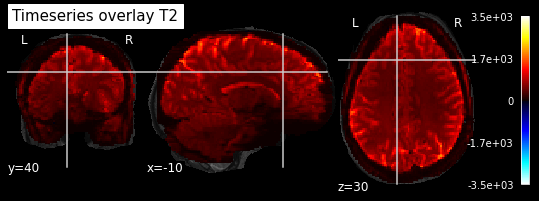

In [56]:
# overlay beta map with brain mask
plotting.plot_stat_map(nib.Nifti1Image(ts, rs_ts.affine), # this function needs a 3D data file
                       bg_img=nib.Nifti1Image(T2, T2_1pt0mm.affine), # load the brain mask as a background picture
                       cut_coords=(-10, 40, 30), 
                       threshold=0, title="Timeseries overlay T2",
                       dim=1,vmax=ts.max())

In [2]:
# 1.8mm MTL mask
rMTL_= nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/rh.MTL.nii.gz")
rMTL = rMTL_.get_fdata()

lMTL_= nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/lh.MTL.nii.gz")
lMTL = lMTL_.get_fdata()

# 1.8mm floc masks
rbodies_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/rh.floc-bodies.nii.gz")
rbodies = rbodies_.get_fdata()

rfaces_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/rh.floc-faces.nii.gz")
rfaces = rfaces_.get_fdata()

rwords_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/rh.floc-words.nii.gz")
rwords = rwords_.get_fdata()

lbodies_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/lh.floc-bodies.nii.gz")
lbodies = lbodies_.get_fdata()

lfaces_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/lh.floc-faces.nii.gz")
lfaces = lfaces_.get_fdata()

lwords_ = nib.load("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/func1pt8mm/roi/lh.floc-words.nii.gz")
lwords = lwords_.get_fdata()

In [43]:
print("rbodies:",np.unique(rbodies))
print("lbodies:",np.unique(lbodies))
print("rfaces:",np.unique(rfaces))
print("Unique numbers in the mask:",np.unique(rMTL))
print(np.sum(rMTL==6))
print(np.sum(lMTL==6))
print(np.sum(rMTL==7))
print(np.sum(lMTL==7))

rbodies: [-1.  0.  1.  2.  3.]
lbodies: [-1.  0.  1.  2.]
rfaces: [-1.  0.  1.  2.  3.  5.]
Unique numbers in the mask: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
10
7
18
14


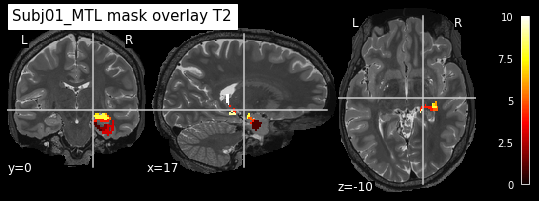

In [39]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(rMTL,rMTL_.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(T2, T2_1pt0mm.affine), # the anatomical background
                       cut_coords=(17, 0, -10), 
                       threshold=0, title="Subj01_MTL mask overlay T2",
                       dim=0.1,vmax=10)

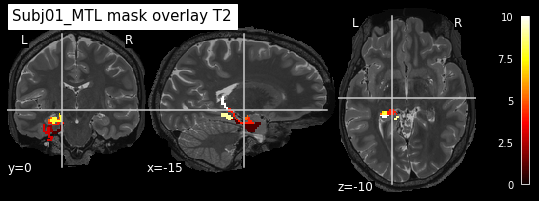

In [36]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(lMTL,lMTL_.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(T2, T2_1pt8mm.affine), # the anatomical background
                       cut_coords=(-15, 0, -10), 
                       threshold=0, title="Subj01_MTL mask overlay T2",
                       dim=0.5,vmax=10)

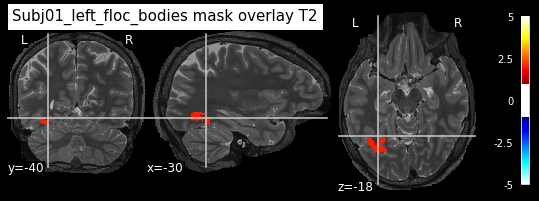

In [72]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(lbodies,lbodies_.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(T2, T2_1pt8mm.affine), # the anatomical background
                       cut_coords=(-30, -40, -18), 
                       threshold=1, title="Subj01_left_floc_bodies mask overlay T2",
                       dim=0.5,vmax=5)

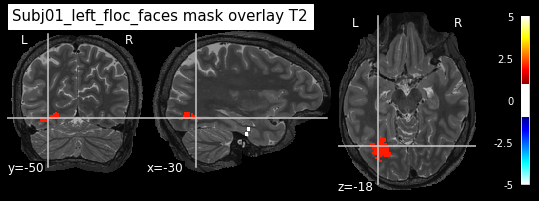

In [79]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(lfaces,lfaces_.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(T2, T2_1pt8mm.affine), # the anatomical background
                       cut_coords=(-30, -50, -18), 
                       threshold=1, title="Subj01_left_floc_faces mask overlay T2",
                       dim=0.5,vmax=5)

In [24]:
# compute ROI connectivity matrix for the first resting state across all sessions
ROI_fc_all = np.zeros(shape=(26,26,10))
for session in range(21,31):
    # load the whole time series
    rs_ts = nib.load(f"/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session{session}_run01.nii.gz")
    ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 
    # get cordinates of where MTL mask label 
    all_region = np.zeros(shape=(226,26))

    # get the right MTL subregions
    for mask_lab in range(1,11):
        mask_cord = np.where(rMTL==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab-1]= region_mean
    # get the left MTL subregions
    for mask_lab in range(1,11):
        mask_cord = np.where(lMTL==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab+9]= region_mean
    # get the floc extraction
    n = 20
    for floc in [rbodies,rfaces,rwords,lbodies,lfaces,lwords]:
        mask_cord = np.where(floc>0)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,n]= region_mean
        n+=1
        
    ROI_fc = np.corrcoef(all_region,rowvar=False)
    ROI_fc_all[:,:,session-21]=ROI_fc
np.save("./ROI_fc_first.npy", ROI_fc_all)

In [2]:
labels = [
"rERC",
"r35 ",
"r36 ",
"rSUB",
"rCA1",
"rCA2",
"rCA3",
"rDG ",
"rPHC",
"rHT ",  
"lERC",
"l35 ",
"l36 ",
"lSUB",
"lCA1",
"lCA2",
"lCA3",
"lDG ",
"lPHC",
"lHT ",
"rbodies",
"rfaces",
"rwords",
"lbodies",
"lfaces",
"lwords"]

In [3]:
fc_first = np.load("./ROI_fc_first.npy")

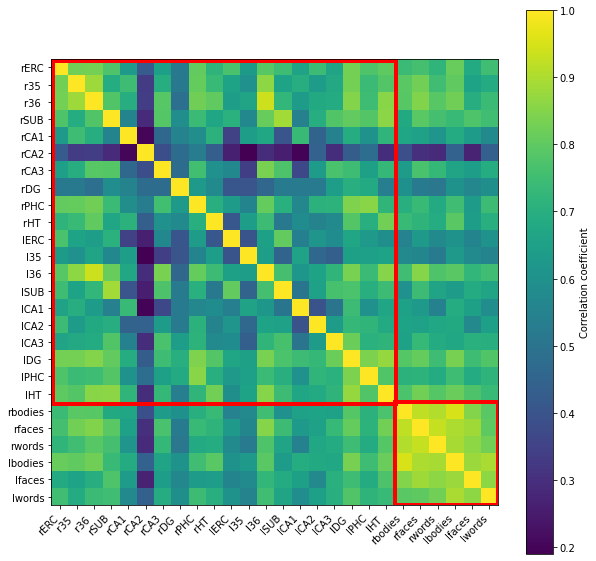

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(fc_first[:,:,0])
ax.set(xticks=range(26),
       xticklabels=labels, 
       yticks=range(26),
       yticklabels=labels)
ax.set_xticklabels(labels, rotation = 45, ha="right")
plt.colorbar(im, ax=ax,label="Correlation coefficient")
ax.add_patch(patches.Rectangle((19.5, 19.5),
                                       6, 6, fill=False, linewidth=4,
                                       edgecolor="red"))
ax.add_patch(patches.Rectangle((-0.4,-0.4),
                                    20, 20, fill=False, linewidth=4,
                                       edgecolor="red"))

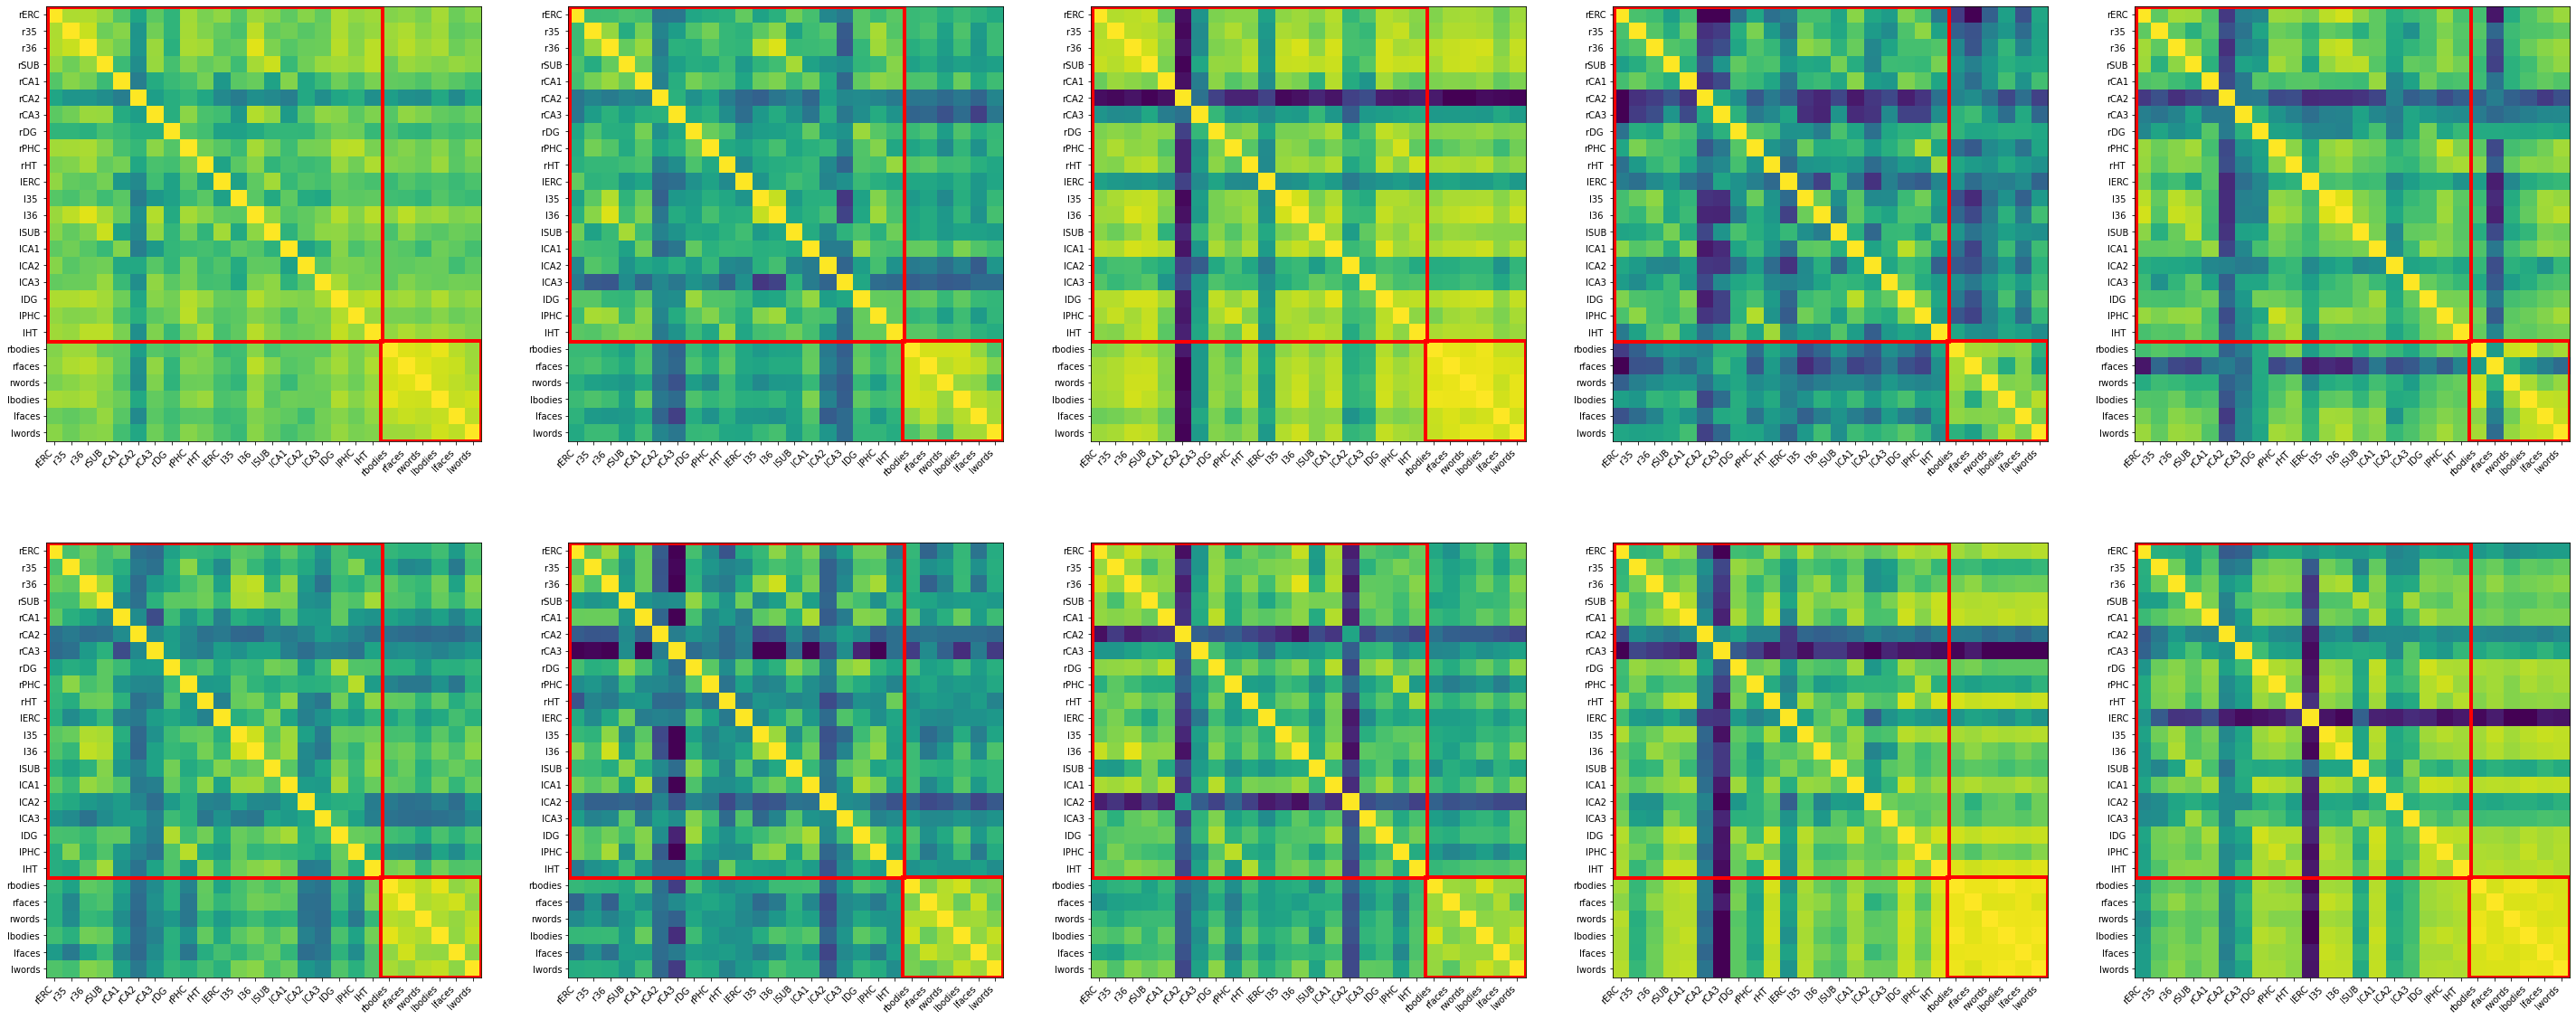

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))
axes_flatten = axes.flatten()
for i in range(10):
    ax = axes_flatten[i]
    
    im = ax.imshow(fc_first[:, :, i])
    im.set_clim(-0.4, 1)
    ax.set(xticks=range(26),
           xticklabels=labels, 
           yticks=range(26),
           yticklabels=labels)
    ax.set_xticklabels(labels, rotation = 45, ha="right")
    ax.add_patch(patches.Rectangle((19.5, 19.5),
                                       6, 6, fill=False, linewidth=4,
                                       edgecolor="red"))
    ax.add_patch(patches.Rectangle((-0.4,-0.4),
                                    20, 20, fill=False, linewidth=4,
                                       edgecolor="red"))
#plt.colorbar(im, ax=ax,label="Correlation coefficient")

In [49]:
# compute ROI connectivity matrix for the first resting state across all sessions
ROI_fc_all = np.zeros(shape=(26,26,10))
for session in range(21,31):
    # load the whole time series
    rs_ts = nib.load(f"/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session{session}_run14.nii.gz")
    ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 
    # get cordinates of where MTL mask label 
    all_region = np.zeros(shape=(226,26))

    # get the right MTL subregions
    for mask_lab in range(1,11):
        mask_cord = np.where(rMTL==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab-1]= region_mean
    # get the left MTL subregions
    for mask_lab in range(1,11):
        mask_cord = np.where(lMTL==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab+9]= region_mean
    # get the floc extraction
    n = 20
    for floc in [rbodies,rfaces,rwords,lbodies,lfaces,lwords]:
        mask_cord = np.where(floc>0)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,n]= region_mean
        n+=1
        
    ROI_fc = np.corrcoef(all_region,rowvar=False)
    ROI_fc_all[:,:,session-21]=ROI_fc
np.save("./ROI_fc_last.npy", ROI_fc_all)

In [5]:
fc_last = np.load("./ROI_fc_last.npy")

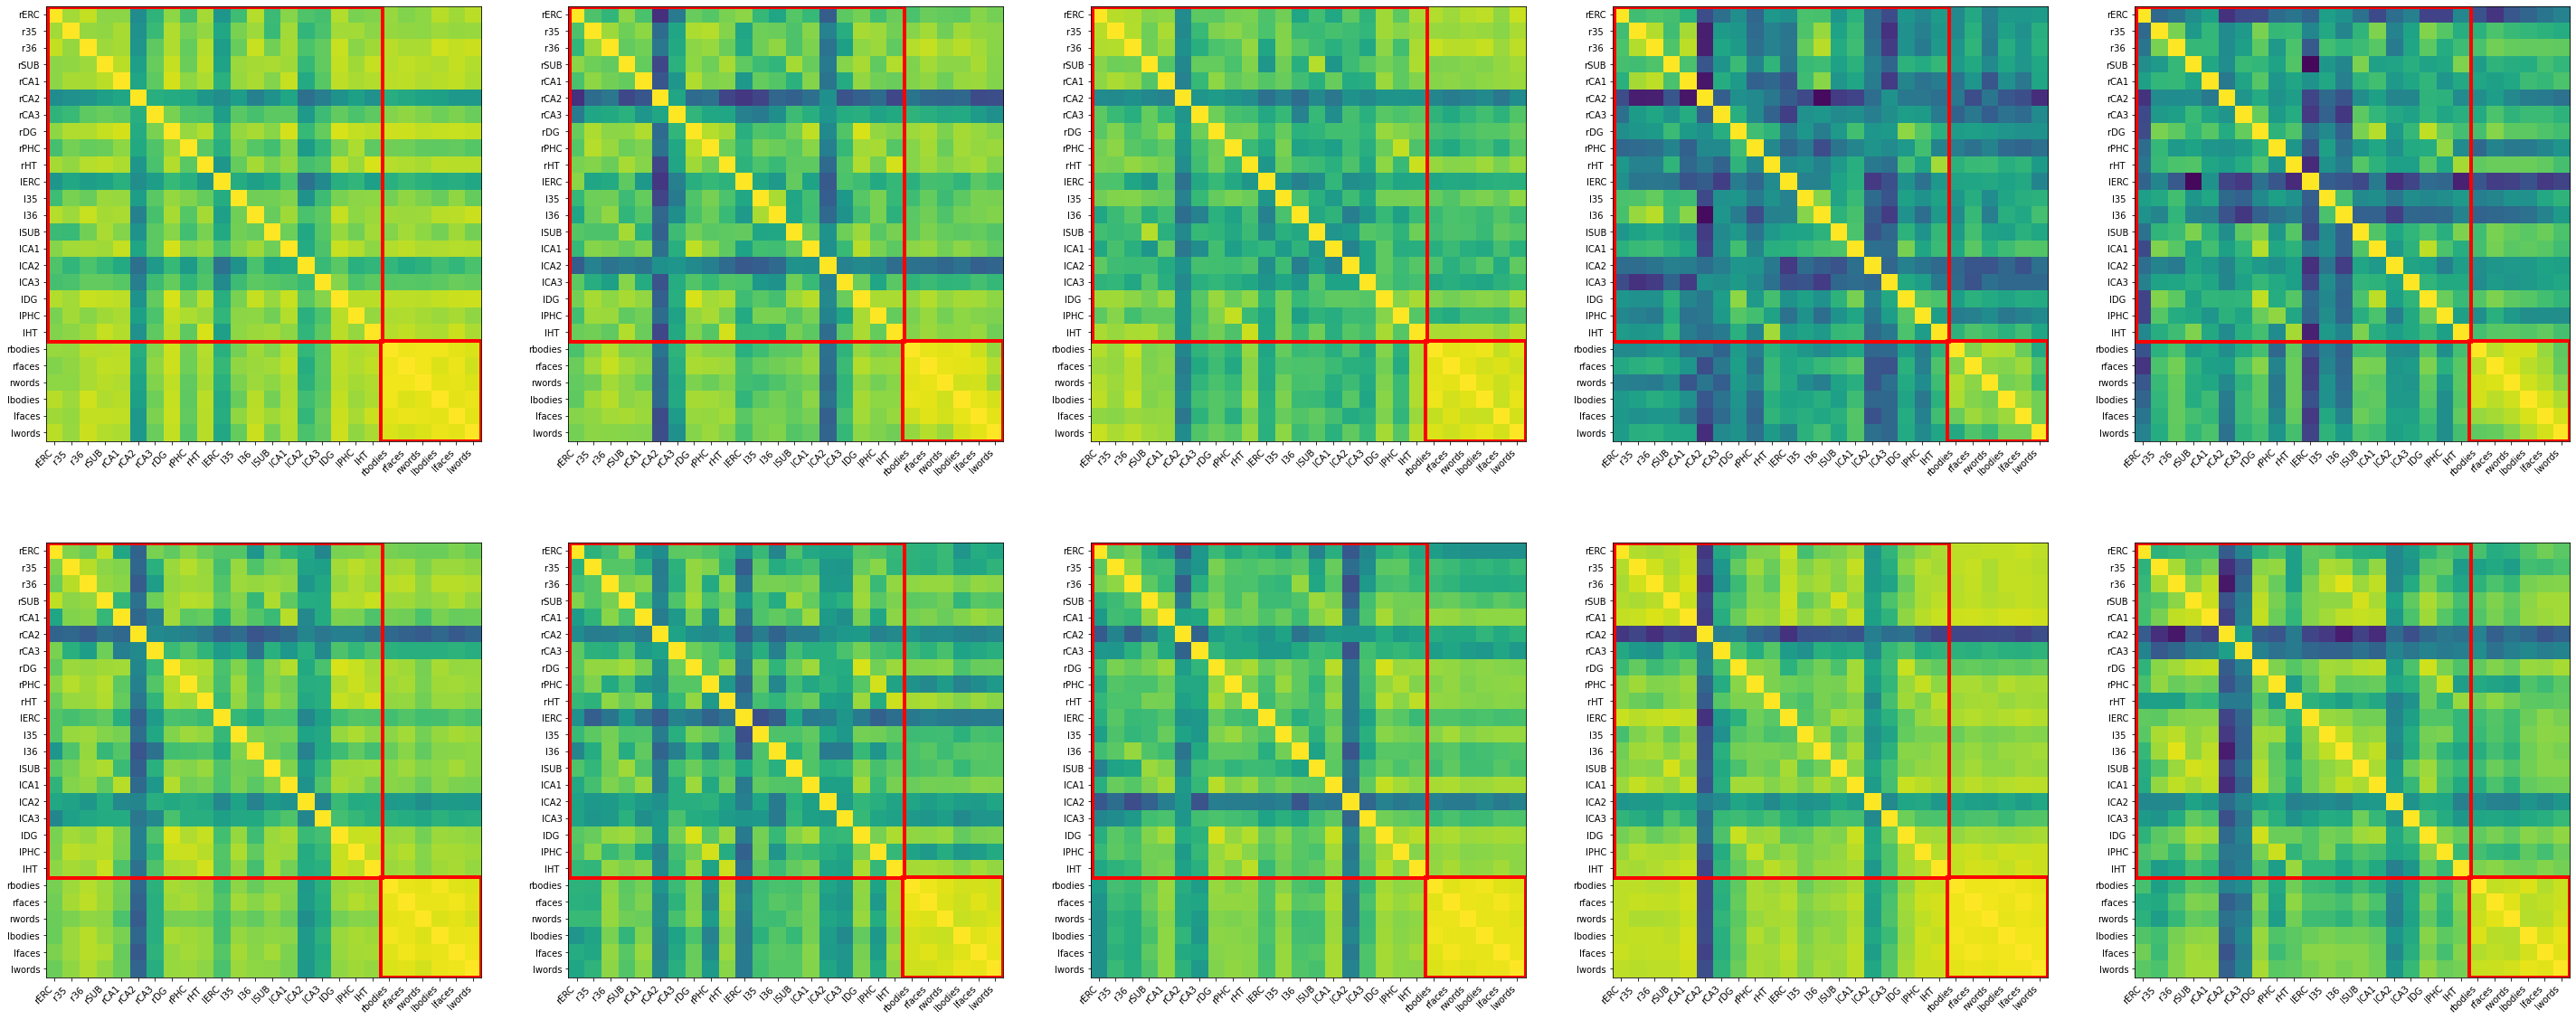

In [99]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))
axes_flatten = axes.flatten()
for i in range(10):
    ax = axes_flatten[i]
    
    im = ax.imshow(fc_last[:, :, i])
    im.set_clim(-0.4, 1)
    ax.set(xticks=range(26),
           xticklabels=labels, 
           yticks=range(26),
           yticklabels=labels)
    ax.set_xticklabels(labels, rotation = 45, ha="right")
    ax.add_patch(patches.Rectangle((19.5, 19.5),
                                       6, 6, fill=False, linewidth=4,
                                       edgecolor="red"))
    ax.add_patch(patches.Rectangle((-0.4,-0.4),
                                    20, 20, fill=False, linewidth=4,
                                       edgecolor="red"))

In [34]:
first_up = fc_first[np.triu_indices_from(fc_first[:,:,0], k=1)[0],np.triu_indices_from(fc_first[:,:,0], k=1)[1],:]
last_up = fc_last[np.triu_indices_from(fc_last[:,:,0], k=1)[0],np.triu_indices_from(fc_last[:,:,0], k=1)[1],:]

In [35]:
first_up.shape

(325, 10)

In [70]:
subj1_cor = np.zeros(10)
for session in range(10):
    subj1_cor[session] = np.corrcoef(first_up[:,session],last_up[:,session])[0,1]

[0.60525776 0.65781253 0.73842647 0.46516838 0.26599653 0.70869405
 0.43810378 0.72900994 0.62828176 0.43466815]


In [ ]:
#### code won't work starting from here ####

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(MTL_fc)
ax.set(xticks=range(10),
       xticklabels=labels, 
       yticks=range(10),
       yticklabels=labels)
plt.colorbar(im, ax=ax,label="Correlation coefficient")

In [14]:
# load the whole time series
rs_ts = nib.load("/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session21_run01.nii.gz")
ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 

In [15]:
# get cordinates of where MTL mask label 
all_region = np.zeros(shape=(226,10))
for mask_lab in range(1,11):
    mask_cord = np.where(mask==mask_lab)
    region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
    region_mean = np.mean(region_ts,axis=0)
    all_region[:,mask_lab-1]= region_mean

In [41]:
all_region.shape

(226, 10)

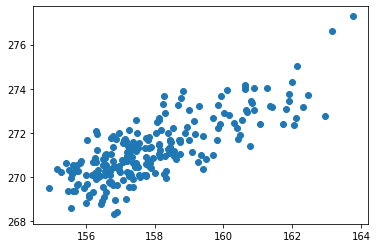

In [44]:
# plot
fig, ax = plt.subplots()
ax.scatter(all_region[:,0],all_region[:,1])
plt.show()

In [16]:
MTL_fc = np.corrcoef(all_region,rowvar=False)

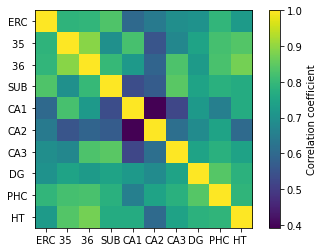

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(MTL_fc)
ax.set(xticks=range(10),
       xticklabels=labels, 
       yticks=range(10),
       yticklabels=labels)
plt.colorbar(im, ax=ax,label="Correlation coefficient")

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


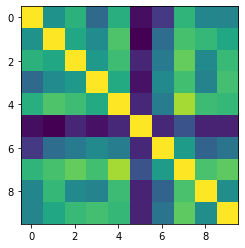

In [28]:
# compute MTL subregion connectivity matrix for a single run
rs_ts = nib.load("/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session21_run14.nii.gz")
ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 
# get cordinates of where MTL mask label 
all_region = np.zeros(shape=(226,10))
for mask_lab in range(1,11):
    mask_cord = np.where(mask==mask_lab)
    region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
    region_mean = np.mean(region_ts,axis=0)
    all_region[:,mask_lab-1]= region_mean
    MTL_fc = np.corrcoef(all_region,rowvar=False)
plt.imshow(MTL_fc)

In [5]:
# compute MTL subregion connectivity matrix for the first resting state across all sessions
MTL_fc_all = np.zeros(shape=(10,10,10))
for session in range(21,31):
    # load the whole time series
    rs_ts = nib.load(f"/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session{session}_run01.nii.gz")
    ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 
    # get cordinates of where MTL mask label 
    all_region = np.zeros(shape=(226,10))
    for mask_lab in range(1,11):
        mask_cord = np.where(mask==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab-1]= region_mean
    MTL_fc = np.corrcoef(all_region,rowvar=False)
    MTL_fc_all[:,:,session-21]=MTL_fc
np.save("./MTL_fc_first.npy", MTL_fc_all)

In [5]:
MTL_mean_all_first = np.mean(MTL_fc_all,axis=2)

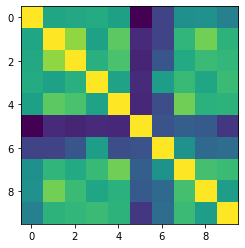

In [6]:
plt.imshow(MTL_mean_all_first)

In [6]:
# compute MTL subregion connectivity matrix for the last resting state across all sessions
MTL_fc_all = np.zeros(shape=(10,10,10))
for session in range(21,31):
    # load the whole time series
    rs_ts = nib.load(f"/home/jovyan/shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session{session}_run14.nii.gz")
    ts = rs_ts.slicer[:,:,:,:].get_fdata() # get all timepoint 
    # get cordinates of where MTL mask label 
    all_region = np.zeros(shape=(226,10))
    for mask_lab in range(1,11):
        mask_cord = np.where(mask==mask_lab)
        region_ts = np.asarray(ts[mask_cord[0],mask_cord[1],mask_cord[2],:])
        region_mean = np.mean(region_ts,axis=0)
        all_region[:,mask_lab-1]= region_mean
    MTL_fc = np.corrcoef(all_region,rowvar=False)
    MTL_fc_all[:,:,session-21]=MTL_fc
np.save("./MTL_fc_last.npy", MTL_fc_all)

In [20]:
MTL_mean_all_last = np.mean(MTL_fc_all,axis=2)
plt.imshow(MTL_mean_all_last,label="Correlation coefficient")

SyntaxError: invalid syntax (3724215003.py, line 2)